## ***Importing Main Libraries***

In [93]:
import pandas as pd
import numpy as np
import re
import nltk
import bs4
from nltk import tokenize
import csv
import spacy
from tqdm import tqdm
from spacy.lang.en import English


from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
from spacy import displacy 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

pd.set_option('display.max_colwidth', 200)

## ***Importing URLs related to the Covid-19 Vaccine and looping on the list***

In [94]:
import requests

urls = ['https://www.nhs.uk/conditions/coronavirus-covid-19/coronavirus-vaccination/coronavirus-vaccine/',
       'https://www.who.int/emergencies/diseases/novel-coronavirus-2019/covid-19-vaccines',
       'https://www.cdc.gov/coronavirus/2019-ncov/vaccines/index.html',
       'https://www.dshs.state.tx.us/covidvaccine/',
       'https://www.bbc.com/news/world-europe-56252028',
       'https://www.health.gov.au/initiatives-and-programs/covid-19-vaccines',
       'https://www.afro.who.int/news/africa-getting-ready-roll-out-covid-19-vaccines',
       'https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30800-8/fulltext',
       'https://www.businessinsider.com/vaccine-wars-rich-countries-battle-doses-poorer-miss-out-2021-1']

#html_page = page.content

req = []

for url in urls:
  page = requests.get(url)
  req.append(page)
  print(page.text)

  html_page = page.content
  html_page_g = []

for res in req:
  html_page_g_temp = res.content
  html_page_g.append(html_page_g_temp)

Streaming output truncated to the last 5000 lines.
                    
                
                
                    
                
                    
                
                    
                        
                        
                        
                    
                
                    
                
                    
                
                    
                        
                        
                            
                        
                        
                            
                            
                            
                        
                    
                
                    
                
                    
                
                    
                
                    
                
                    
                
                
                
                <div class="widget sessionValidationWidget none  widget-none  widget

In [95]:
from bs4 import BeautifulSoup

soup = bs4.BeautifulSoup(html_page, 'html.parser')
all_text = soup.get_text() # get all the text.

In [96]:
html_page_s = []

#for res in req:
#  html_page_s_temp = res.content
#  html_page_s.append(html_page_s_temp)

soup_s = []

for html_page in html_page_s:
  soup_s_temp = bs4.BeautifulSoup(html_page, 'html.parser')

all_text_s = []

for soup in soup_s:
  all_text_temp = soup.get_text() 
  all_text_s.append(all_text_temp)

Convert the test to sentences and save them all into a CSV file

In [97]:
nltk.download('punkt')
sentences = tokenize.sent_tokenize(all_text) #Convert all text to sentences using Tokenize

#Saving all the senteces into a CSV file and name is "output.csv"
with open('output.csv', 'w', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['sentence'])
    for row in sentences:
        writer.writerow([str(row)])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
# import the sentences from .csv file
example_sentences = pd.read_csv("output.csv", encoding= 'unicode_escape')
example_sentences [0:5]

,sentence
0,"\n\n\nCOVID-19 vaccine wars: Rich battle for doses, poor miss out\nfunction createPerformanceMark(e){void 0!==window.performance&&void 0!==window.performance.mark&&performance.mark(e)}function cre..."
1,(r&&r.timing&&r.timing[i]))return;f=r.timing[i]-r.timing.navigationStart}}if(a){var w=o(a);if(w)s=w.startTime;else{if(!
2,"(r&&r.timing&&r.timing[a]))return;s=r.timing[a]-r.timing.navigationStart}}n.push({name:e,entryType:""measure"",startTime:f,duration:s-f})},gaMarks:e,gaMeasures:n}}(),LUX.ns=Date.now?Date.now():+new ..."
3,""",""oneSignalAppId"":""25c4709f-5af5-43d0-ad8c-3eab89d2a521"",""pianoRid"":""RK195MO"",""recommendationsPlaylist"":""4yvN3aI1"",""verticalLabelMapping"":{""life"":""Executive Lifestyle"",""bi intelligence"":""Business..."
4,""",""section"":""politics"",""date"":""2021-01-27T16:55:35.626Z"",""keywords"":[""coronavirus""],""title"":""Ugly vaccine fights are emerging as rich countries battle for doses while poorer countries miss out com..."


In [99]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [100]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

In [101]:
from contractions import contractions_dict

def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())                               
        return first_char+expanded_contraction[1:] if expanded_contraction != None else match
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [102]:
def lemmatize_text(text):
    text = nlp(text)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])

In [103]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('is')
stopword_list.remove('are')

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
    return normalized_corpus

In [105]:
full_sentences = example_sentences['sentence'].sample(50)
print(full_sentences)

3      ","oneSignalAppId":"25c4709f-5af5-43d0-ad8c-3eab89d2a521","pianoRid":"RK195MO","recommendationsPlaylist":"4yvN3aI1","verticalLabelMapping":{"life":"Executive Lifestyle","bi intelligence":"Business...
2      (r&&r.timing&&r.timing[a]))return;s=r.timing[a]-r.timing.navigationStart}}n.push({name:e,entryType:"measure",startTime:f,duration:s-f})},gaMarks:e,gaMeasures:n}}(),LUX.ns=Date.now?Date.now():+new ...
34     Log in\n \n\n                        Subscribe\n                    \n\n\n                    Subscribe\n                \n\n\n\n\n\n\n\n Newsletters\n\n\n\nWorld globe\nAn icon of the world globe...
88     South Africa is yet to administer a single coronavirus vaccine.Some might argue that there is nothing inherently wrong with "vaccine nationalism" â that it is merely the function of nation-state...
89                                                                 But, quite aside from the ethical case for ensuring poorer countries can access vaccines, there is an eco

In [106]:
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
nlp=spacy.load('en_core_web_sm')

clean_sentences =    normalize_corpus(full_sentences, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True)

def clean_sentences_new(n):
    n=int(n[0:20])
    return n

In [107]:
clean_sentences[0:7]

['onesignalappid25c4709f5af5 43d0ad8c3eab89d2a521pianoridrk195morecommendationsplaylist4yvn3ai1verticallabelmapping lifeexecutive lifestylebi intelligencebusiness insider intelligencebi newsnewstech insidertechprimeprehemiumbi primeprehemiumwuhan coronaviruscoronavirusbeauty personal care review beauty personal caredeal review dealseducation personal development review education personal developmenttech electronics review tech electronicsfitness review fitnessgift review giftshealth review healthhome review homekitchen review kitchenoutdoor review outdoorsparente review parentingpet review petsstreame review streamingstyle review styletravel review traveldiet nutrition reference diet nutritioninvesting reference investingeconomic market reference economics marketsinvestment asset reference investment assetsinvestment account reference investment accountsinveste strategy reference invest strategiesprofessionals advisor reference professional advisorslaptops tablet reference laptop table

In [108]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("israel aim immunize entire country march success")

for tok in doc:
  print(tok.text, "...", tok.dep_)

israel ... nsubj
aim ... ROOT
immunize ... xcomp
entire ... amod
country ... compound
march ... compound
success ... dobj


In [109]:
nlp=spacy.load('en_core_web_sm')

def get_entities(sent):
  
# chunk 1 (2 entities are provided)
  ent1 = ""
  ent2 = ""

  previous_tok_dep = ""    # dependency for previous token
  previous_tok_text = ""   # the text of the previous token (from the sentence)

  prefix = ""
  modifier = ""
  
# chunk 2
    # if token is a punctuation mark then move on to the next token
  for tok in nlp(sent):
    if tok.dep_ != "punct":
      # Check for compound words in the token
      if tok.dep_ == "compound":
        prefix = tok.text
        # If yes, add the current word to it
        if previous_tok_dep == "compound":
          prefix = previous_tok_text + " "+ tok.text
      
      # check if the token is a modifier
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # If yes, add the current word to it
        if previous_tok_dep == "compound":
          modifier = previous_tok_text + " "+ tok.text
      
# chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        previous_tok_dep = ""
        previous_tok_text = ""      

# chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
# chunk 5  
      previous_tok_dep = tok.dep_
      previous_tok_text = tok.text

  return [ent1.strip(), ent2.strip()]


In [110]:
get_entities("israel aim immunize entire country march success")

['israel', 'entire country march success']

In [111]:
entity_pairs = []
for i in tqdm(clean_sentences):    
    if type(i) != float:
        entity_pairs.append(get_entities(i))

entity_pairs[0:20]

100%|██████████| 50/50 [00:00<00:00, 67.28it/s]


[['covid19  vaccine', 'poor  country'],
 ['global healthcare strategy story', 'vtl6vsddvideonielsenapidp5982de1d31c5'],
 ['icon world globe', 'international  option'],
 ['wrong vaccine nationalism', 'single coronavirus nothing'],
 ['ethical  case', 'public access vaccine health'],
 ['poor health minister europe', 'fair share vaccine supply'],
 ['resistant risk reinfecte country', 'strong case vaccine one'],
 ['european union week', 'drug giant uk vaccine supply'],
 ['rich country battle', 'completely thomas colson'],
 ['', ''],
 ['', ''],
 ['insider rich business insider country', 'supply poor country miss'],
 ['ability', 'ehemail'],
 ['', ''],
 ['hope', 'small percentage population year'],
 ['insider logo', 'insider'],
 ['covid19  vaccine', 'poor  country'],
 ['', 'global economy interconnect'],
 ['apstag init config', 'string ccpa window'],
 ['expandable section menu', 'next navigation option']]

In [112]:
def get_relation(sent):

  doc = nlp(sent)
  matcher = Matcher(nlp.vocab)

  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [113]:
get_relation("israel aim immunize entire country march success")

'aim'

In [114]:
#relations = [get_relation(i) for i in tqdm(example_sentences['[64]'])]
relations = []
for i in tqdm(clean_sentences):
    if type(i) != float:
        relations.append(get_relation(i))

100%|██████████| 50/50 [00:00<00:00, 76.66it/s]


In [115]:
pd.Series(relations).value_counts()[0:10]

indicate           5
word               3
x                  2
hoard              2
start              1
return             1
vaccinate small    1
head               1
secure enough      1
pledge             1
dtype: int64

In [116]:
subjects = [item[0] for item in entity_pairs]
objects = [item[1] for item in entity_pairs]

df_graph = pd.DataFrame({'subjects':subjects, 'objects':objects, 'edge':relations})
df_graph[0:30]

,subjects,objects,edge
0,covid19 vaccine,poor country,hoard
1,global healthcare strategy story,vtl6vsddvideonielsenapidp5982de1d31c5,tell global
2,icon world globe,international option,indicate different
3,wrong vaccine nationalism,single coronavirus nothing,citizen
4,ethical case,public access vaccine health,ensure poor
5,poor health minister europe,fair share vaccine supply,consider
6,resistant risk reinfecte country,strong case vaccine one,prove
7,european union week,drug giant uk vaccine supply,clash
8,rich country battle,completely thomas colson,letter
9,,,country


Part 4

In [117]:
import rdflib
from rdflib import Graph    #Library to use RDF
from rdflib.parser import Parser

g = rdflib.Graph()

In [118]:
result = g.parse('http://dbpedia.org/resource/Coronavirus')

In [119]:
print(f'graph has {len(result)} facts')

graph has 1171 facts


In [120]:
for index, (sub, pred, obj) in enumerate(g): 
  print(sub, pred, obj)
  if index == 10:
    break

http://dbpedia.org/resource/Coronavirus_(disambiguation) http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Coronavirus
http://dbpedia.org/resource/List_of_Doctors_characters_(2020) http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Coronavirus
http://dbpedia.org/resource/Coronavirus http://dbpedia.org/property/wikiPageUsesTemplate http://dbpedia.org/resource/Template:Refbegin
http://dbpedia.org/resource/Abu_Dhabi http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Coronavirus
http://dbpedia.org/resource/Coronavirus http://www.w3.org/2002/07/owl#sameAs http://da.dbpedia.org/resource/Coronavirus
http://dbpedia.org/resource/Coronavirinae http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Coronavirus
http://dbpedia.org/resource/Griffithsin http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Coronavirus
http://dbpedia.org/resource/Bushmeat http://dbpedia.org/ontology/wikiPageWikiLink

In [121]:
#Seralize using the turtle method
print(g.serialize(format='ttl').decode('u8'))

@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbp: <http://dbpedia.org/property/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/resource/2002> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Coronavirus> .

<http://dbpedia.org/resource/2002–2004_SARS_outbreak> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Coronavirus> .

<http://dbpedia.org/resource/2010s_in_health_and_society> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Coronavirus> .

<http://dbpedia.org/resource/2012_Middle_East_respiratory_syndrome_coronavirus_outbreak> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Coronavirus> .

<http://dbpedia.org/resource/2012_in_science> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Coronavirus> .

<http:/

In [122]:
g1 = rdflib.Graph()
result = g1.parse('https://dbpedia.org/resource/COVID-19_vaccine')

In [123]:
from rdflib.namespace import RDF, RDFS, FOAF

for topic in g1.subjects(RDF.type, FOAF.topic):
  for ent in g1.objects(topic, RDFS.label):
    print(ent)

In [124]:
print(g1.serialize(format='n3').decode('utf-8'))

@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbp: <http://dbpedia.org/property/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/resource/2019–20_Maltese_Premier_League> dbo:wikiPageWikiLink <http://dbpedia.org/resource/COVID-19_vaccine> .

<http://dbpedia.org/resource/2020> dbo:wikiPageWikiLink <http://dbpedia.org/resource/COVID-19_vaccine> .

<http://dbpedia.org/resource/2020_Democratic_National_Convention> dbo:wikiPageWikiLink <http://dbpedia.org/resource/COVID-19_vaccine> .

<http://dbpedia.org/resource/2020_coronavirus_vaccine> dbo:wikiPageRedirects <http://dbpedia.org/resource/COVID-19_vaccine> ;
    dbo:wikiPageWikiLink <http://dbpedia.org/resource/COVID-19_vaccine> .

<http://dbpedia.org/resource/2020_in_United_States_politics_and_government> dbo:wikiPageWik

In [125]:
G=nx.from_pandas_edgelist(df_graph, "subjects", "objects", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

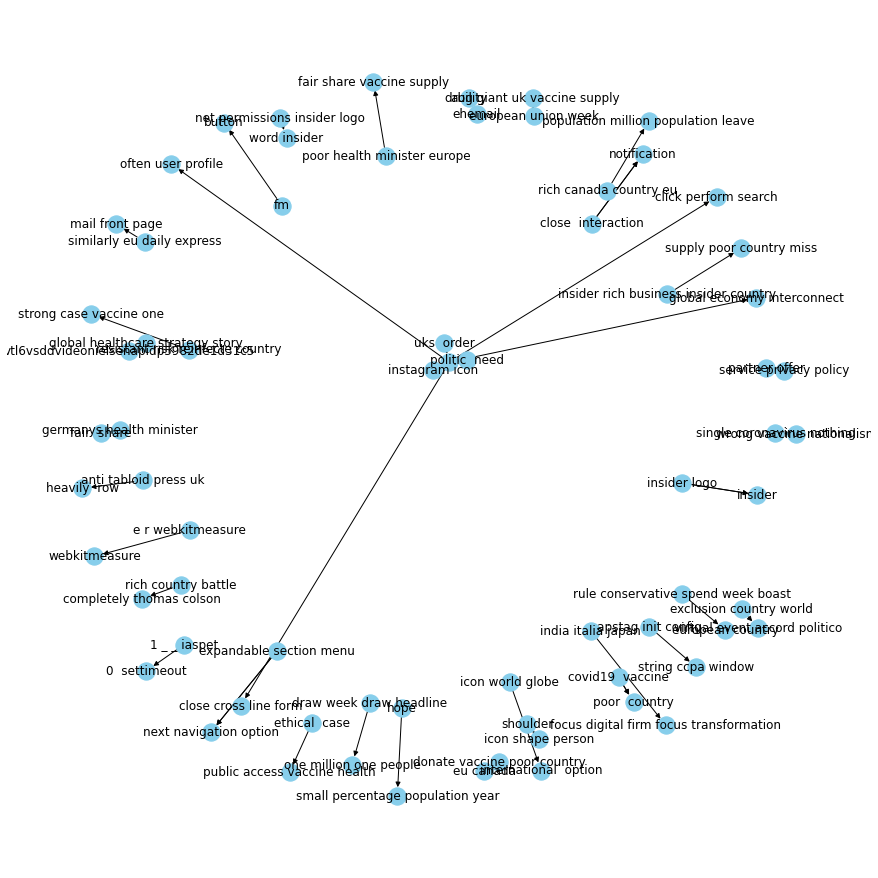

In [128]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(g[g['edge']=="clarified"], "subjects", "objects", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
print(G)
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()